In [1]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance


In [2]:
file_path = '../data/Cleaned_Diseases_feature_engineering_Data.csv'
diseases_df = pd.read_csv(file_path)

# Encode Disease columns into numerical lables for multi-class classification

In [4]:
# Encode Disease column into numerical labels
le = LabelEncoder()
diseases_df["DiseaseEncoded"] = le.fit_transform(diseases_df["Disease"])

- le.fit_transform(diseases_df["Disease"]):
    - Finds all unique disease names.
    - Assigns a unique integer to each disease.
    - Replaces the Disease column with these numerical values.
- A new column "DiseaseEncoded" is created to store the encoded values.

lets define </br>
-x: the feature matrix (all symptom binary features) </br>
-y: the target vector ( numerically encoded disease) </br>

In [5]:
# Define features (X) and target (y)
X = diseases_df.drop(columns=["Disease", "DiseaseEncoded"])
y = diseases_df["DiseaseEncoded"]

1. Features (X)
- diseases_df.drop(columns=["Disease", "DiseaseEncoded"]):

    - Drops the original categorical "Disease" column (which is a string).
    - Drops the "DiseaseEncoded" column (which is the target label).
    - Keeps only the symptom features (which are one-hot encoded).
2. Target Variable (y)
- Stores the encoded disease labels as the target variable (y), which the ML model will learn to predict.

**We need to drop "DiseaseEncoded" from X (the feature matrix) because it is the target variable (y) that we are trying to predict** 

# 4. Splitting the data

In [6]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

1. train_test_split()
- Function from sklearn.model_selection that randomly splits data into training and testing sets.
2. Parameters Used:
- X, y → The feature matrix (X) and target labels (y).
- test_size=0.3 → 30% of the dataset is used for testing, and 80% is used for training.
- stratify=y → Ensures that the class distribution in y is preserved in both training and testing sets.
    - This is important if y has imbalanced classes (e.g., some diseases appear more often than others).
- random_state=42 → Fixes the random seed for reproducibility, ensuring the same split occurs each time.

- nables Softmax Regression (Multinomial Logistic Regression).
- Instead of treating multi-class classification as multiple binary (one-vs-rest) problems, it directly optimizes for all classes together using the Softmax function.
- Why?
    - If multi_class='ovr' (One-vs-Rest), the model trains multiple binary classifiers (one for each class).
    - Multinomial (Softmax Regression) is generally better for true multi-class classification.

In [8]:
# Initialize Softmax Regression Model
clf = LogisticRegression(
    multi_class='multinomial',  # Enables Softmax Regression
    solver='lbfgs',  # Optimizer (can also use 'saga' for large datasets)
    class_weight='balanced',  # Handles class imbalance
    max_iter=1000,  # Ensures proper convergence
    random_state=42
)
clf.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial', random_state=42)

In [9]:
# Predict on test set
y_pred = clf.predict(X_test)

In [10]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Classification Report:
                 precision    recall  f1-score   support

    Chicken pox       0.85      0.94      0.89        36
    Common Cold       1.00      1.00      1.00        36
         Dengue       0.95      1.00      0.97        36
    Hepatitis B       0.36      1.00      0.53        36
    Hepatitis E       0.00      0.00      0.00        36
Hyperthyroidism       1.00      1.00      1.00        36
   Hypoglycemia       1.00      1.00      1.00        36
 Hypothyroidism       1.00      1.00      1.00        36
       Migraine       1.00      1.00      1.00        36
      Pneumonia       1.00      1.00      1.00        36
        Typhoid       1.00      1.00      1.00        36
    hepatitis A       1.00      0.08      0.15        36

       accuracy                           0.84       432
      macro avg       0.85      0.84      0.80       432
   weighted avg       0.85      0.84      0.80       432



d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- SHAP Feature Importance

In [11]:
# Create SHAP explainer
explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_train)

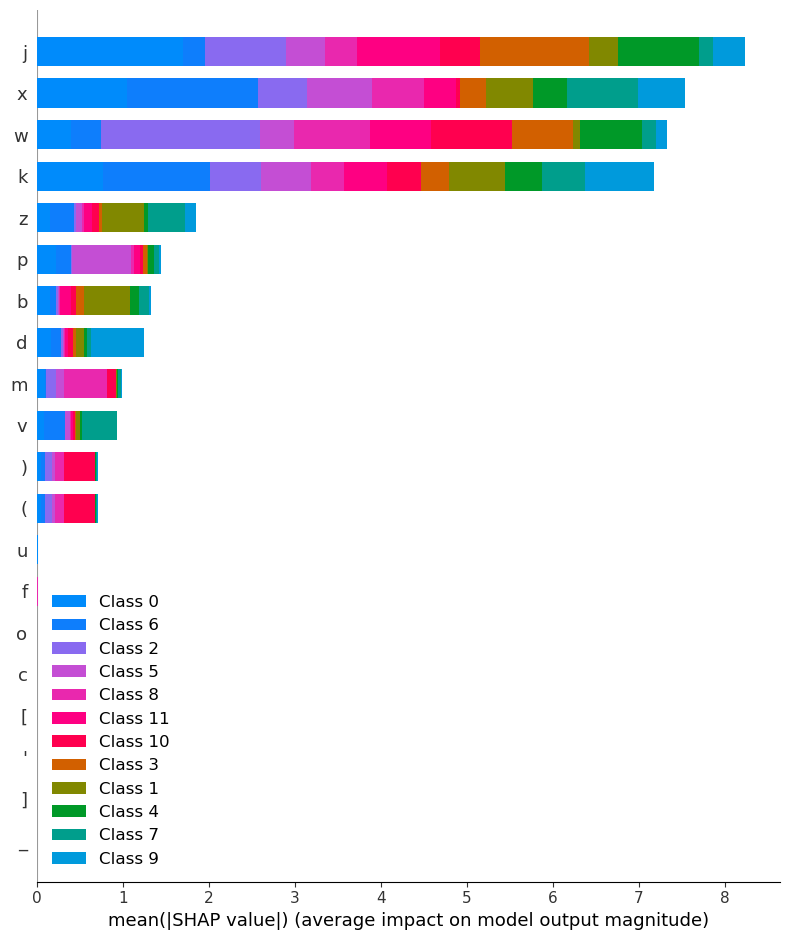

In [12]:
# Plot SHAP summary
shap.summary_plot(shap_values, X_train)

- Permutation Feature Importance

In [13]:
# Compute permutation importance
perm_importance = permutation_importance(clf, X_test, y_test, scoring='accuracy')

In [14]:
# Store results in a DataFrame
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

In [15]:
# Print feature importance
print("\nPermutation Feature Importance:")
print(feature_importance)


Permutation Feature Importance:
   Feature  Importance
29       w    0.105556
17       j    0.094444
11       d    0.093056
30       x    0.090741
23       p    0.086574
28       v    0.085185
9        b    0.024537
18       k    0.022222
20       m    0.007870
32       z    0.002778
3        )    0.000463
2        (    0.000463
27       u    0.000000
26       t    0.000000
31       y    0.000000
25       s    0.000000
24       r    0.000000
22       o    0.000000
21       n    0.000000
0             0.000000
19       l    0.000000
1        '    0.000000
15       h    0.000000
14       g    0.000000
13       f    0.000000
12       e    0.000000
10       c    0.000000
8        a    0.000000
7        _    0.000000
6        ]    0.000000
5        [    0.000000
4        ,    0.000000
16       i    0.000000


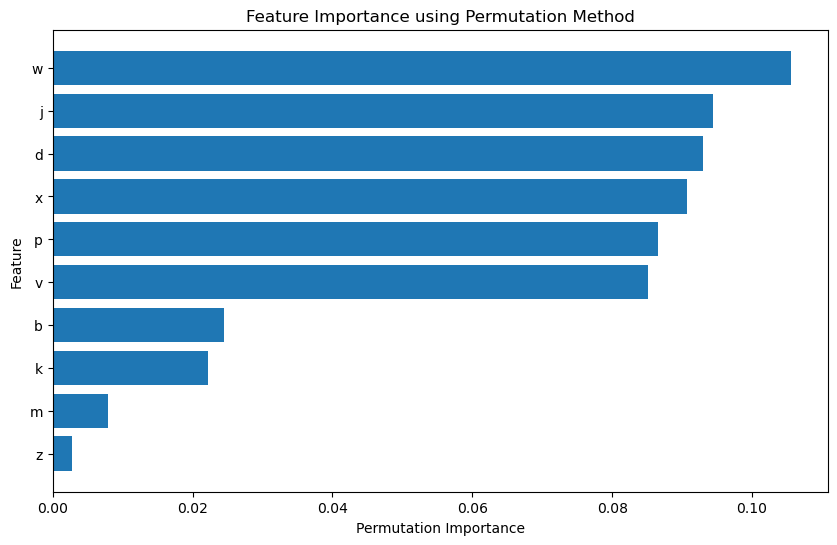

In [16]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:10], feature_importance['Importance'][:10])
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.title("Feature Importance using Permutation Method")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important at the top
plt.show()

- Feature Engineering

In [17]:
# Identify most important features
top_features = feature_importance[feature_importance["Importance"] > 0.01]["Feature"].tolist()
print("\nTop Important r:", top_features)


Top Important r: ['w', 'j', 'd', 'x', 'p', 'v', 'b', 'k']


In [18]:
# Create interaction features using top 2 most important features
if len(top_features) >= 2:
    X_train["Feature_Interaction"] = X_train[top_features[0]] * X_train[top_features[1]]
    X_test["Feature_Interaction"] = X_test[top_features[0]] * X_test[top_features[1]]

In [19]:
# Apply transformations (log, square)
for feature in top_features[:3]:  # Modify top 3 important features
    X_train[f"{feature}_squared"] = X_train[feature] ** 2
    X_test[f"{feature}_squared"] = X_test[feature] ** 2

    X_train[f"{feature}_log"] = np.log1p(X_train[feature].abs())
    X_test[f"{feature}_log"] = np.log1p(X_test[feature].abs())

1. Dimensionality Reduction: Principal Component Analysis (PCA)
- Instead of dropping features, you can use PCA to reduce the number of features while keeping most of the information.

In [28]:
from sklearn.decomposition import PCA

# Keep enough components to explain 95% of the variance
pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Original feature count: {X_train.shape[1]}")
print(f"Reduced feature count: {X_train_pca.shape[1]}")


Original feature count: 40
Reduced feature count: 8


In [37]:
# Retrain model with PCA-transformed data
clf.fit(X_train_pca, y_train)

# Predict on test set
y_pred_pca = clf.predict(X_test_pca)


In [38]:
from sklearn.metrics import classification_report

print("Classification Report (After PCA):")
print(classification_report(y_test, y_pred_pca, target_names=le.classes_))


Classification Report (After PCA):
                 precision    recall  f1-score   support

    Chicken pox       0.80      0.92      0.86        36
    Common Cold       1.00      1.00      1.00        36
         Dengue       1.00      0.94      0.97        36
    Hepatitis B       0.36      1.00      0.53        36
    Hepatitis E       0.00      0.00      0.00        36
Hyperthyroidism       1.00      1.00      1.00        36
   Hypoglycemia       1.00      1.00      1.00        36
 Hypothyroidism       1.00      1.00      1.00        36
       Migraine       1.00      1.00      1.00        36
      Pneumonia       0.92      1.00      0.96        36
        Typhoid       1.00      1.00      1.00        36
    hepatitis A       1.00      0.08      0.15        36

       accuracy                           0.83       432
      macro avg       0.84      0.83      0.79       432
   weighted avg       0.84      0.83      0.79       432



d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- Check Confusion Matrix

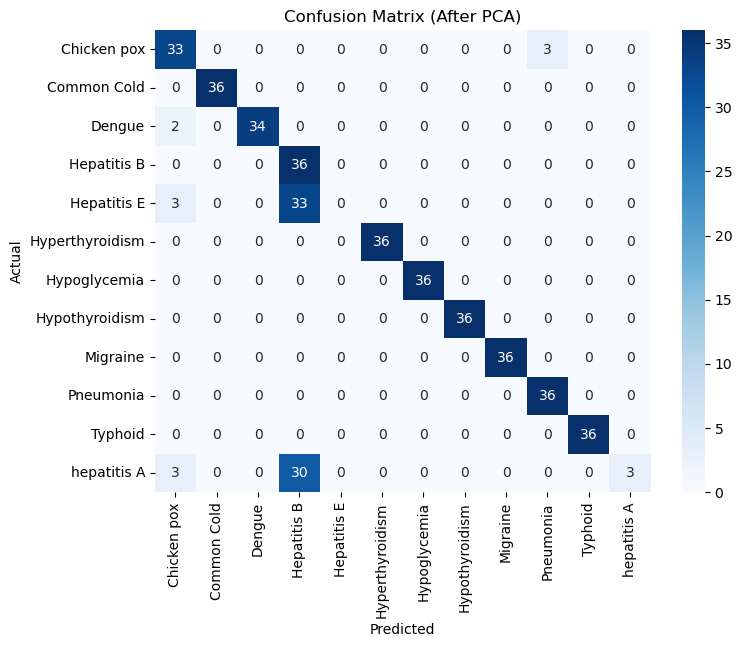

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_pca)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (After PCA)")
plt.show()
